In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load job market
df = pd.read_csv('job-market.csv')

<AxesSubplot:ylabel='Classification'>

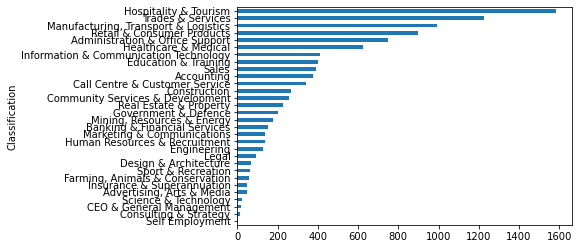

In [3]:
%matplotlib inline
x = df.groupby('Classification')['Id'].count().sort_values()
x.plot(kind = 'barh')

In [4]:
import matplotlib
#create dataframe for salary ranges
salaryDf = df[df['LowestSalary'].isna()==False]
salaryDf = salaryDf.groupby('LowestSalary').count()
salaryDf['LowestSalary'] = salaryDf.index
salaryDf['Count'] = salaryDf["Id"]
salaryDf.head()




,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,HighestSalary,JobType,LowestSalary,Count
LowestSalary,,,,,,,,,,,,,,
0.0,3894,3894,3571,3894,3894,2560,3894,3894,3894,3737,3894,3740,0.0,3894
30.0,1842,1842,1779,1842,1842,1082,1842,1842,1842,1815,1842,1816,30.0,1842
40.0,2519,2519,2373,2519,2519,1516,2519,2519,2519,2474,2519,2475,40.0,2519
50.0,1844,1844,1760,1844,1844,1234,1844,1844,1844,1817,1844,1821,50.0,1844


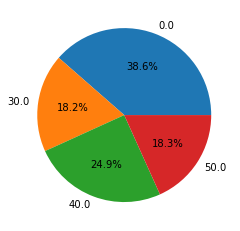

In [6]:
#salary ranges plot
plt.pie(salaryDf['Count'],labels=salaryDf['LowestSalary'], autopct= '%1.1f%%')
plt.show()



In [ ]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

In [ ]:
%matplotlib inline
# Pie char for job market share of cities

majorCities = locationDf.loc[["Adelaide", "Perth", "Brisbane", "Melbourne", "Sydney"]]
otherCities = locationDf.drop(locationDf.loc[["Adelaide", "Perth", "Brisbane", "Melbourne", "Sydney"]].index)
total = otherCities['Count'].sum()
new_row = locationDf.loc[["ACT"]]
new_row['Count'] = total
new_row = new_row.rename(index={'ACT': 'Others'})
majorCities = majorCities.append(new_row)
majorCities

label = ["Adelaide", "Perth", "Brisbane", "Melbourne", "Sydney", "Others"]
plt.pie(majorCities['Count'], labels=label, autopct= '%1.1f%%')
plt.show()
